## Streamlining Supply Chains for Instant Noodles Business: A Data-Driven Approach

### Business Challenge

An FMCG corporation entered the instant noodles business two years back. However, they've noted a significant disparity between demand and supply across their nationwide network of warehouses. Some regions experience heightened demand for instant noodles, yet face inadequate supply, resulting in lost sales opportunities and customer dissatisfaction. Conversely, other areas exhibit lower demand, yet maintain surplus supply, leading to unnecessary inventory expenses.

Recognizing the detrimental impact of this supply chain imbalance on profitability, senior management has acknowledged the need for corrective action. Their aim is to optimize supply quantities in each warehouse throughout the country. The goal is to synchronize supply with local demand, reduce inventory costs, and improve overall operational efficiency.








<img src="https://vir.com.vn/stores/news_dataimages/hung/082021/20/16/1557-instant-noodle-groups-strive-to-get-supply-out.jpg?rt=20210820164437" alt="FMCG" style="width: 500px;"/>






### Technical Plan of Action

To confront this challenge, we'll employ a data-driven strategy with technical precision. Here's how we'll proceed:

1.**Data Collection**: Gather historical sales and inventory data from all locations for each warehouse over the past two years to identify trends and patterns.

2.**Data Cleaning**: Process the collected data to handle missing values, outliers and inconsistencies, ensuring its suitability for analysis.

3.**Exploratory Data Analysis (EDA)**:
    
    • Analyze the data to identify patterns and discrepancies in demand and supply.
    • Pinpoint areas of high demand and low supply, as well as regions with surplus supply and low demand.

4.**Documentation & Reporting**: Findings of EDA

5.**Feature Engineering**: Create or transform features that can improve the predictive power of the model.

6.**Model Building**: 

    • Implement linear regression models using techniques like gradient descent for optimization.
    • Train the model on the training dataset and evaluate its performance using appropriate metrics like Mean Squared Error    (MSE) or Root Mean Squared Error (RMSE).
    
7.**Model Evaluation**: Use the metrics to assess the model's performance.

### Feature Descriptions

Here, we'll provide the explanations for each of the features in the dataset.

1.**Ware_house_ID**: ID of product warehouse.

2.**WH_Manager_ID**: ID of managers of each warehouse who are responsible for the operations and decision-making.

3.**Location_type**: Shows whether the warehouse is located in urban area or rural area.

4.**WH_capacity_size**: Shows the capacity of warehouse, that indicates its storage capabilities.

5.**zone**: Shows zone of the warehouse.(East,West,North,South)

6.**WH_regional_zone**: Shows the warehouse located regional zone, which can have impact on supply chain planning & distribution.

7.**num_refill_req_l3m**: The number of times refill have been requested in the last 3 months, which is a measure of inventory management.

8.**transport_issue_l1y**: Shows whether the warehouse had transport-issues in the last year, which could impact supply chain.

9.**Competitor_in_mkt**: Shows the number of competitors in the market.

10.**retail_shop_num**: Shows the number of retail shops serviced by the warehouse, influencing the demand for products. 

11.**wh_owner_type**: Shows type of ownership (owned or rented)

12.**distributor_num**: Shows number of distributors, which affects the distribution network

13.**flood_impacted**: Shows whether the warehouse was impacted by floods, a factor that could affect operations & require flood-proofing.

14.**flood_proof**: Shows whether the warehouse is flood-proof, which is crucial for maintaining inventory during flood events.

15.**electric_supply**: Shows whether the warehouse has electic backup, so they can run even in load shedding.

16.**dist_from_hub**: The distance between the warehouse & central hub or distribution center, which influences the transportation costs and logistics.

17.**workers_num**: Shows the number of workers at the warehouse, which impacts efficiency.

18.**wh_est_year**: Shows the warehouse established year.

19.**storage_issue_reported_l3m**: Shows the number of storage-issue reports submitted to corporate office in the last 3 months.

20.**temp_reg_mach**: Shows whether the warehouse has temperature-regulatory machines, which is essential for storing certain products.

21.**approved_wh_govt_certificate**: Shows the government-approved certificate grades of each warehouse, which can affect its legality and reliability.

22.**wh_breakdown_l3m**: Shows the number of times each warehouse went through breakdown in the last 3 months.(e.g: strike, flood, power failure)

23.**govt_check_l3m**: Shows the number of times government offices visited the warehouse to check quality in the last 3 months.

24.**product_wg_ton(target column)**: Product shipped in the last 3 months. Weight is in tons.


### Project Goal and Objective

In this data-driven project, our primary aim is to construct a predictive model and conduct thorough demand analysis using historical data. This project marks the initial phase of our partnership with the company, with a focus on presenting tangible outcomes. Upon successful demonstration, the company will grant access to a comprehensive data lake, facilitating the development of a more robust model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


### Data Structure

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\Data.csv")
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


In [3]:
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [4]:
#renaming columns
data.rename(columns={'Ware_house_ID':'warehouse_id','WH_Manager_ID':'wh_manager_id','Location_type':'location_type','WH_capacity_size':'wh_capacity_size','WH_regional_zone':'wh_regional_zone','Competitor_in_mkt':'competitor_in_mkt'},inplace=True)
data

,warehouse_id,wh_manager_id,location_type,wh_capacity_size,zone,wh_regional_zone,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


In [5]:
data.shape
data.location_type.value_counts()

location_type
Rural    22957
Urban     2043
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   warehouse_id                  25000 non-null  object 
 1   wh_manager_id                 25000 non-null  object 
 2   location_type                 25000 non-null  object 
 3   wh_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   wh_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### Data Cleaning

In [7]:
data.isna().sum()

warehouse_id                        0
wh_manager_id                       0
location_type                       0
wh_capacity_size                    0
zone                                0
wh_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [8]:
#imputing values for missing values
from sklearn.impute import SimpleImputer
mode_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data["approved_wh_govt_certificate"]=pd.DataFrame(mode_imputer.fit_transform(data[["approved_wh_govt_certificate"]]))
data["approved_wh_govt_certificate"].isna().sum()                        

0

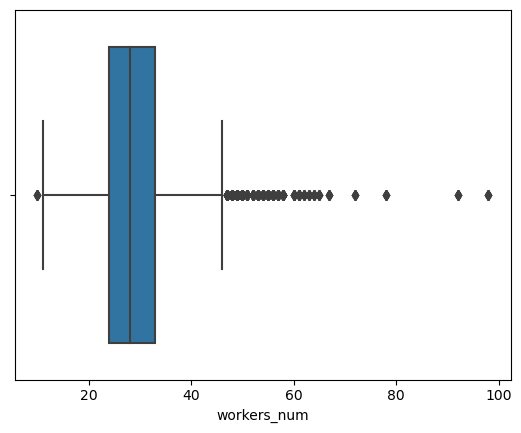

0

In [9]:
import seaborn as sns
sns.boxplot(x=data['workers_num'])
plt.show()
median_imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data["workers_num"]=pd.DataFrame(median_imputer.fit_transform(data[["workers_num"]]))
data["workers_num"].isna().sum()

In [10]:
missing_percentage=(data.wh_est_year.isna().sum()/data.wh_est_year.size)*100
missing_percentage

47.524

In [11]:
#dropping the column : wh_est_year as half of the data is missing
data.drop(["wh_est_year"],axis=1,inplace=True)
data

,warehouse_id,wh_manager_id,location_type,wh_capacity_size,zone,wh_regional_zone,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,0,1,142,34.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,0,1,130,28.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,0,1,147,28.0,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,0,1,60,25.0,18,0,A,6,30,25093


In [12]:
#checking for duplicate rows
duplicates = data.duplicated()
num_duplicates = sum(duplicates)
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


### Exploratory Data Analysis (EDA)

In [13]:
data.describe()

,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.907000,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.717275,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


#### Location type analysis

What is the distribution of warehouses across urban and rural areas?

In [14]:
location_distribution = data['location_type'].value_counts()
location_distribution

location_type
Rural    22957
Urban     2043
Name: count, dtype: int64

Rural areas have more warehouses, indicating high market demand.

In [15]:
total_warehouses_by_zone = data.groupby(['location_type', 'zone'])['warehouse_id'].count().reset_index()
total_warehouses_by_zone



,location_type,zone,warehouse_id
0,Rural,East,395
1,Rural,North,9400
2,Rural,South,5881
3,Rural,West,7281
4,Urban,East,34
5,Urban,North,878
6,Urban,South,481
7,Urban,West,650


In [16]:
total_warehouses_by_zone_regional = data.groupby(['zone','wh_regional_zone'])['warehouse_id'].count().reset_index()
total_warehouses_by_zone_regional


,zone,wh_regional_zone,warehouse_id
0,East,Zone 1,43
1,East,Zone 3,112
2,East,Zone 4,142
3,East,Zone 5,74
4,East,Zone 6,58
5,North,Zone 1,841
6,North,Zone 2,854
7,North,Zone 3,961
8,North,Zone 4,1186
9,North,Zone 5,1917


In [17]:
pivot_table = data.pivot_table(index='location_type', columns='wh_regional_zone', aggfunc='size', fill_value=0)
pivot_table

wh_regional_zone,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6
location_type,,,,,,
Rural,1908,2734,2632,3806,4218,7659
Urban,146,229,249,370,369,680


**Zone 6** contains more warehouses in both urban and rural areas.

In [18]:
pivot_table_1 = data.pivot_table(index='zone', columns='wh_regional_zone', aggfunc='size', fill_value=0)
pivot_table_1
pivot_table_1['Total'] = pivot_table_1.sum(axis=1)
pivot_table_1

wh_regional_zone,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6,Total
zone,,,,,,,
East,43,0,112,142,74,58,429
North,841,854,961,1186,1917,4519,10278
South,680,1444,885,882,1107,1364,6362
West,490,665,923,1966,1489,2398,7931


**North**-highest number of warehouses 

**East**-lowest number of warehouses

In East, **Zone 2** does not have any warehouses.
Let's check whether East zone is facing transportation issues, flood issues or other breakdowns.


In [19]:
transport_issues_by_zone = data.groupby(['zone', 'transport_issue_l1y']).size().reset_index(name='count')
transport_issues_by_zone_pivot = transport_issues_by_zone.pivot(index='zone', columns='transport_issue_l1y', values='count')
transport_issues_by_zone_pivot['total'] = transport_issues_by_zone_pivot.sum(axis=1)
transport_issues_by_zone_pivot


transport_issue_l1y,0,1,2,3,4,5,total
zone,,,,,,,
East,257,83,32,40,13,4,429
North,6194,1954,921,740,333,136,10278
South,3877,1183,558,438,215,91,6362
West,4887,1424,687,600,216,117,7931


In [20]:
total_flood_impacted_by_zone = data.groupby('zone')['flood_impacted'].sum()
total_flood_impacted_by_zone



zone
East       32
North    1052
South     621
West      749
Name: flood_impacted, dtype: int64

In [21]:
total_wh_breakdown_l3m_by_zone = data.groupby('zone')['wh_breakdown_l3m'].sum()
total_wh_breakdown_l3m_by_zone


zone
East      1515
North    35611
South    22055
West     27870
Name: wh_breakdown_l3m, dtype: int64

There is no clear reason for the lesser number of warehouses in East.

#### Warehouse Capacity & its Manpower

In [22]:
zone_whcapacity = data.pivot_table(index='zone', columns='wh_capacity_size', values='warehouse_id', aggfunc='count', fill_value=0)
zone_whcapacity

wh_capacity_size,Large,Mid,Small
zone,,,
East,74,254,101
North,5490,3001,1787
South,1615,3211,1536
West,2990,3554,1387


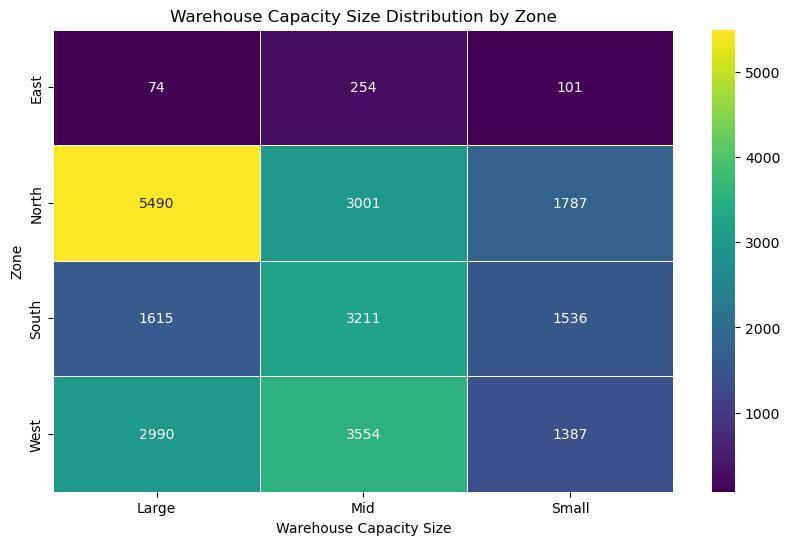

In [23]:
# Creating heatmap to represent this graphically
plt.figure(figsize=(10, 6))
sns.heatmap(zone_whcapacity, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Warehouse Capacity Size Distribution by Zone')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Zone')
plt.show()


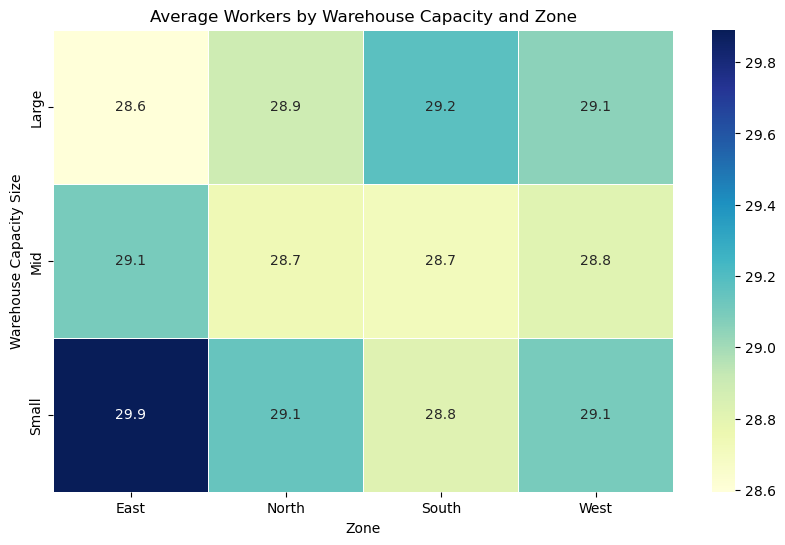

In [24]:
# Creating a pivot table to represent avg no. of workers in large, mid and small warehouses in each zones.
workers_capacity = data.pivot_table(index='wh_capacity_size', columns='zone', values='workers_num', aggfunc='mean')

# Plotting the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(workers_capacity, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title("Average Workers by Warehouse Capacity and Zone")
plt.xlabel("Zone")
plt.ylabel("Warehouse Capacity Size")
plt.show()

**Large Capacity Warehouses**: Warehouses have relatively consistent average numbers of workers. 

**Mid Capacity Warehouses**: There is variability. In the East zone, mid-capacity warehouses have a higher average number of workers compared to other zones.
    
**Small Capacity Warehouses**: Small capacity warehouses generally have higher average numbers of workers across all zones. This could suggest that these warehouses are overstaffed relative to their capacity, potentially leading to inefficiencies in labor utilization.
  
Further analysis is needed to understand the factors driving variations in workforce allocation across zones and capacity sizes, and adjustments should be made accordingly to ensure that labor resources are effectively utilized to meet operational demands while maintaining efficiency.







#### Warehouses & Retail Shops

Is there a balance between the number of warehouses & the number of retail shops?

In [25]:
wh_rs = data.groupby(['location_type', 'zone']).agg(
    total_warehouses=('warehouse_id', 'count'),
    total_retail_shops=('retail_shop_num', 'sum')
).reset_index()

wh_rs


,location_type,zone,total_warehouses,total_retail_shops
0,Rural,East,395,1886009
1,Rural,North,9400,47471330
2,Rural,South,5881,29508285
3,Rural,West,7281,35596545
4,Urban,East,34,175268
5,Urban,North,878,4397937
6,Urban,South,481,2424491
7,Urban,West,650,3182924


In **Rural** area, there seems to be a sufficient number of retail shops for the number of warehouses.

But in **Urban** area, there may be a need for more retail shops to meet the demand created by the warehouses.
  In East, there are only 34 warehouses with a total retail shop sum of 173,949.5. 


#### Sales accross Zones

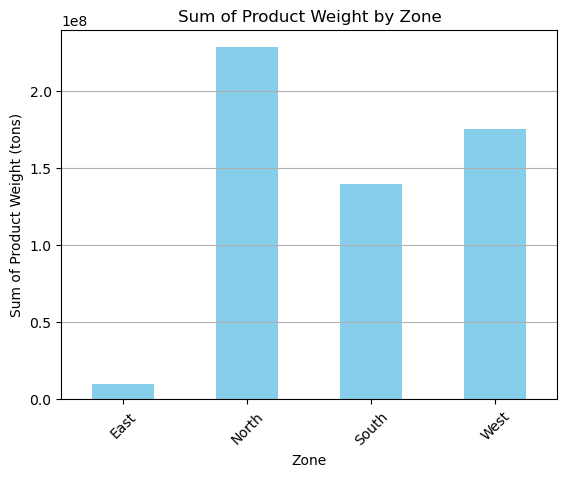

In [26]:
sum_product_by_zone = data.groupby('zone')['product_wg_ton'].sum()

# Plotting the sum of 'product_wg_ton' for each zone
sum_product_by_zone.plot(kind='bar', color='skyblue')
plt.xlabel('Zone')
plt.ylabel('Sum of Product Weight (tons)')
plt.title('Sum of Product Weight by Zone')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

This indicates that the North zone has the highest demand for products, followed by the West, South, and East zones.

**North Zone**: Increasing inventory stock levels can ensure that demand is consistently met without stockouts. Enhance the distribution network, ensure timely fulfillment of orders.

**East Zone**: Conduct in-depth market analysis to identify factors contributing to lower sales in the East zone and develop strategies to address them. Focus on enhancing customer engagement and satisfaction through personalized services, promotions, and incentives.Expanding the warehouse network could enhance distribution efficiency.

In [27]:
#sum of sales in each zone
sum_sales = {
    'East': 9747503,
    'North': 228165823,
    'South': 139540901,
    'West': 175111596
}

#number of warehouses in each zone
num_warehouses = {
    'East': 429,
    'North': 10278,
    'South': 6362,
    'West': 7931
}

# Check if there is enough sales based on warehouse numbers in each zone
for zone, sales in sum_sales.items():
    warehouses = num_warehouses[zone]
    if sales < warehouses:
        print(f"Not enough sales in {zone} zone based on warehouse numbers.")
    else:
        print(f"Sales in {zone} zone are sufficient based on warehouse numbers.")


Sales in East zone are sufficient based on warehouse numbers.
Sales in North zone are sufficient based on warehouse numbers.
Sales in South zone are sufficient based on warehouse numbers.
Sales in West zone are sufficient based on warehouse numbers.


#### Competitors & Sales accross Zones

**How does the number of competitors in the market correlate with demand for instant noodles?**

In [28]:
competitors_by_zone = data.groupby('zone')['competitor_in_mkt'].sum()
competitors_by_zone

zone
East      2241
North    30666
South    15984
West     28714
Name: competitor_in_mkt, dtype: int64

**East Zone**: With a relatively low number of competitors (2176) and moderate sales (9,747,503), there seems to be an opportunity for growth in this zone. Increasing the number of warehouses or improving distribution channels could help capture more market share.

**North Zone**: Despite having the highest number of competitors (30,666), the North zone also boasts the highest sales volume (228,165,823). This indicates a competitive market but also significant potential for revenue. Strategies to maintain market dominance and enhance operational efficiency should be considered.

**South Zone**: With a moderate number of competitors (15,980) and sales (139,540,901), the South zone appears to have balanced competition and demand. Focus should be on maintaining current market share while exploring opportunities for growth in specific segments.

**West Zone**: Similar to the North zone, the West zone faces intense competition with a high number of competitors (28,658). However, its sales volume (175,111,596) suggests a strong market presence. Efforts to optimize supply chain operations and differentiate products could enhance profitability in this competitive landscape.

#### Storage Issues & factors 

In [29]:
#relevant columns
columns_to_check = ['workers_num', 'product_wg_ton', 'retail_shop_num', 'transport_issue_l1y', 'storage_issue_reported_l3m']

# Creating a correlation matrix
storage_matrix = data[columns_to_check].corr()

storage_matrix

,workers_num,product_wg_ton,retail_shop_num,transport_issue_l1y,storage_issue_reported_l3m
workers_num,1.000000,-0.008072,-0.005301,-0.008825,-0.008395
product_wg_ton,-0.008072,1.000000,-0.006615,-0.173992,0.986777
retail_shop_num,-0.005301,-0.006615,1.000000,-0.001826,-0.006632
transport_issue_l1y,-0.008825,-0.173992,-0.001826,1.000000,-0.144327
storage_issue_reported_l3m,-0.008395,0.986777,-0.006632,-0.144327,1.000000


**Workers Number and Storage Issues**: Weak negative correlation (-0.008926) suggests that increasing or decreasing the number of workers may have minimal impact on reducing storage issues.

**Product Weight and Storage Issues**: Strong positive correlation (0.986777) indicates that as sales increase, the likelihood of storage issues also increases significantly. Strategies to optimize storage methods or invest in infrastructure to handle higher sales volumes may be necessary to maintain operational efficiency.

**Retail Shops and Storage Issues**: Weak negative correlation (-0.007224) suggests that the number of retail shops does not have a significant impact on storage issues.

**Transport Issues and Storage Issues**: A moderate negative correlation (-0.150176) suggests that improving transportation efficiency may have a slight positive impact on reducing storage issues.

In [30]:
storage_reported_by_capacity = data.groupby('wh_capacity_size')['storage_issue_reported_l3m'].sum()
storage_reported_by_capacity 

wh_capacity_size
Large    174247
Mid      172481
Small     81533
Name: storage_issue_reported_l3m, dtype: int64

**Warehouse capacity and Storage Issues**: Small warehouses have reported relatively fewer storage issues compared to larger counterparts. Implementing efficient storage solutions, such as automated storage systems or improved inventory tracking methods, may help mitigate these issues and enhance operational efficiency.

### Problems faced in Warehouses

#### Flood Issues

In [31]:
flood_impacted_count_df = data.groupby(['zone', 'wh_regional_zone'])['flood_impacted'].count().reset_index()
flood_impacted_count_df

,zone,wh_regional_zone,flood_impacted
0,East,Zone 1,43
1,East,Zone 3,112
2,East,Zone 4,142
3,East,Zone 5,74
4,East,Zone 6,58
5,North,Zone 1,841
6,North,Zone 2,854
7,North,Zone 3,961
8,North,Zone 4,1186
9,North,Zone 5,1917


In [32]:
flood_proof_status = data.groupby(['zone', 'wh_regional_zone'])['flood_proof'].sum()
flood_proof_status

zone   wh_regional_zone
East   Zone 1                4
       Zone 3               13
       Zone 4                4
       Zone 5                1
       Zone 6                3
North  Zone 1               40
       Zone 2               48
       Zone 3               61
       Zone 4               66
       Zone 5               99
       Zone 6              227
South  Zone 1               28
       Zone 2               69
       Zone 3               48
       Zone 4               57
       Zone 5               69
       Zone 6               82
West   Zone 1               24
       Zone 2               34
       Zone 3               51
       Zone 4              116
       Zone 5               83
       Zone 6              139
Name: flood_proof, dtype: int64

The North (mainly Zone 6) and South zones have a higher number of warehouses impacted by floods .
The North and West zones have implemented more flood-proofing measures.
While not as severe as the North, the South zone, especially Zone 6, also has a considerable number of warehouses impacted by floods.

Implementing flood-proofing measures in these regions, can help mitigate the risks associated with floods and ensure the continuity of operations in the supply chain.


#### Transportation issues

In [33]:
summary_by_region_zone = data.groupby(['zone', 'wh_regional_zone']).agg({
    'transport_issue_l1y': 'sum',
    'warehouse_id': 'count',
    'retail_shop_num': 'sum',
    'dist_from_hub': 'mean'  # calculating mean distance from hub
}).reset_index()

summary_by_region_zone.rename(columns={'transport_issue_l1y': 'Total_Transportation_Issues', 
                                       'warehouse_id': 'Total_Warehouses', 
                                       'retail_shop_num': 'Total_Retail_Shops',
                                       'dist_from_hub': 'Avg_Distance_From_Hub'}, inplace=True)

summary_by_region_zone


,zone,wh_regional_zone,Total_Transportation_Issues,Total_Warehouses,Total_Retail_Shops,Avg_Distance_From_Hub
0,East,Zone 1,36,43,197320,171.465116
1,East,Zone 3,86,112,580316,169.866071
2,East,Zone 4,122,142,644600,156.014085
3,East,Zone 5,51,74,334660,154.054054
4,East,Zone 6,44,58,304381,169.275862
5,North,Zone 1,695,841,4367743,162.161712
6,North,Zone 2,649,854,4257793,165.117096
7,North,Zone 3,737,961,4857874,161.744017
8,North,Zone 4,962,1186,6054109,162.303541
9,North,Zone 5,1539,1917,9680436,163.375065


**East Zone**: Zone 4 has the highest number of transportation issues .

**North Zone**: Zone 6 faces the highest number of transportation issues.

**South Zone**: Zone 6 experiences the highest number of transportation issues in the South.

**West Zone**: Zone 6 faces the highest number of transportation issues in the West.
    
    Overall, Zone 6 in each regional zone tends to have the highest transportation issues, while Zone 1 generally has fewer transportation issues.

**Are warehouses with higher numbers of distributors more likely to experience transport issues?**

In [34]:
transport_distributor = data['transport_issue_l1y'].corr(data['distributor_num'])

print("Correlation between transport issues and distributor numbers:", transport_distributor)

Correlation between transport issues and distributor numbers: 0.008992777174672674


This indicates an extremely weak positive correlation. In other words, the presence of more distributors does not significantly affect the occurrence of transport issues at warehouses.

#### Temperature Regulatory Machines & Electric Supply 

In [35]:
electric_temp_issues = data.groupby(['zone', 'wh_regional_zone'])[['electric_supply', 'temp_reg_mach']].sum().reset_index()
electric_temp_issues

,zone,wh_regional_zone,electric_supply,temp_reg_mach
0,East,Zone 1,26,10
1,East,Zone 3,65,38
2,East,Zone 4,95,46
3,East,Zone 5,50,23
4,East,Zone 6,36,13
5,North,Zone 1,549,252
6,North,Zone 2,552,257
7,North,Zone 3,648,293
8,North,Zone 4,775,347
9,North,Zone 5,1281,610


**Temperature-regulating Machines**:
In most zones and regional zones, the number of temperature-regulating machines is significantly lower than the number of warehouses. This shortage suggests that there may not be enough machines to regulate the temperature effectively in all warehouses.

North-Zone 5 and West-Zone 4, have a higher number of machines relative to the number of warehouses, while it suggests a better provision of temperature regulation, there could be an overinvestment leading to higher initial costs and ongoing maintenance expenses.

**Electric Supply**:
Similar to temperature-regulating machines, the number of electric supply sources is generally lower than the number of warehouses in most zones and regional zones.
Overall, the shortage of electric supply compared to the number of warehouses suggests potential issues with ensuring continuous power availability for all warehouses.
Zones like South Zone 2 and West Zone 6 show a relatively better provision of electric supply compared to the number of warehouses, indicating a more reliable power infrastructure in those areas.

There is a general shortage of these resources across the board. It would be advisable to invest in additional machines and ensure robust electric supply infrastructure to support the operations of warehouses effectively and mitigate risks associated with temperature fluctuations and power outages.

#### Owner Type

In [36]:
ownership_distribution = data['wh_owner_type'].value_counts()
ownership_distribution

wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64

In [37]:
#counting the number of warehouses for each owner type
owner_type_count = data.groupby(['zone', 'wh_regional_zone', 'wh_owner_type'])['warehouse_id'].count().reset_index()

# Pivot the table to have owner types as columns
owner_type_pivot = owner_type_count.pivot_table(index=['zone', 'wh_regional_zone'], columns='wh_owner_type', values='warehouse_id', fill_value=0).reset_index()

# Renaming the columns for clarity
owner_type_pivot.columns.name = None  
owner_type_pivot.columns = ['zone', 'wh_regional_zone', 'owned_warehouses', 'rented_warehouses']
owner_type_pivot



,zone,wh_regional_zone,owned_warehouses,rented_warehouses
0,East,Zone 1,24,19
1,East,Zone 3,59,53
2,East,Zone 4,81,61
3,East,Zone 5,42,32
4,East,Zone 6,29,29
5,North,Zone 1,463,378
6,North,Zone 2,447,407
7,North,Zone 3,521,440
8,North,Zone 4,615,571
9,North,Zone 5,1053,864


While some areas exhibit a higher proportion of owned warehouses, others lean towards rented ones.

To avoid business challenges and enhance cost-effectiveness, it's crucial to maintain a balanced mix of ownership types, ensuring flexibility and resilience in the supply chain while optimizing costs.

### Documentation & Reporting

The EDA reveals significant disparities in demand and supply across regions, along with infrastructure challenges and market dynamics impacting operational efficiency and profitability.

**Key Insights**:

**Market Demand-Supply Gap**: Addressing discrepancies in demand and supply is crucial for optimizing inventory levels and meeting customer needs effectively.

**Infrastructure Challenges**: Transportation inefficiencies, flood risks, and inadequate temperature-regulating machines and electric supply sources pose operational challenges that require immediate attention.

**Market Opportunities**: Analysis of competitor presence and sales volumes identifies growth opportunities in less competitive zones with moderate sales volumes.

**Workforce Efficiency**: Optimizing workforce allocation and operational processes can improve efficiency and reduce costs, contributing to overall profitability.

**Ownership Mix**: Balancing owned and rented warehouses ensures flexibility and resilience in the supply chain, supporting long-term sustainability.

**Recommendations**:

**Demand-Driven Inventory Management**: Implement data-driven inventory practices to align supply with local demand, reducing stockouts and inventory costs.

**Infrastructure Investment**: Invest in critical infrastructure improvements to enhance operational resilience and mitigate risks.

**Market Expansion Strategies**: Leverage competitor analysis to identify growth opportunities and expand strategically into underserved markets.

**Operational Optimization**: Streamline workforce allocation and processes to improve efficiency and reduce costs.

**Flexible Ownership Models**: Maintain flexibility in warehouse ownership to adapt to changing market conditions and business needs.

By implementing these recommendations, the company can optimize its supply chain, enhance market competitiveness, and drive sustainable growth and profitability in the instant noodles market.

### Feature Engineering

In [38]:
# import libraries
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


In [39]:
data.head()

,warehouse_id,wh_manager_id,location_type,wh_capacity_size,zone,wh_regional_zone,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.0,18,0,C,6,24,24071


In [40]:
data.columns

Index(['warehouse_id', 'wh_manager_id', 'location_type', 'wh_capacity_size',
       'zone', 'wh_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

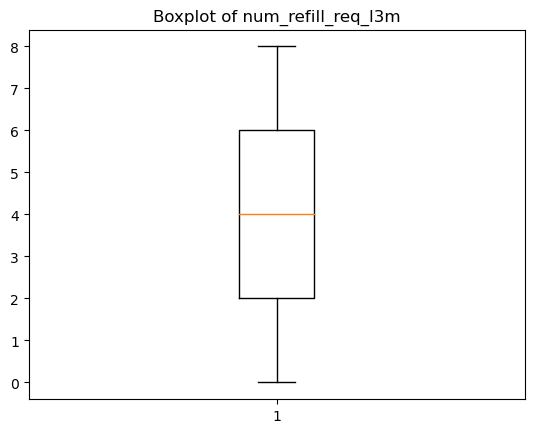

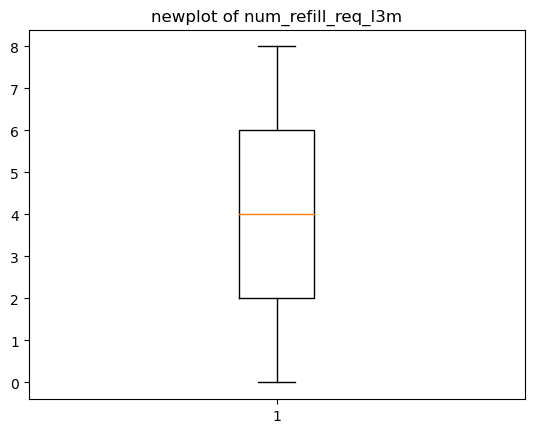

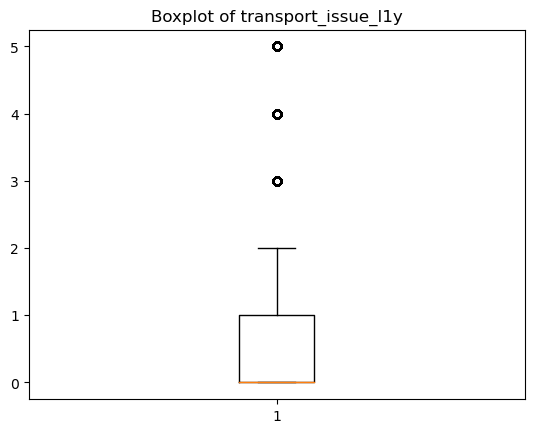

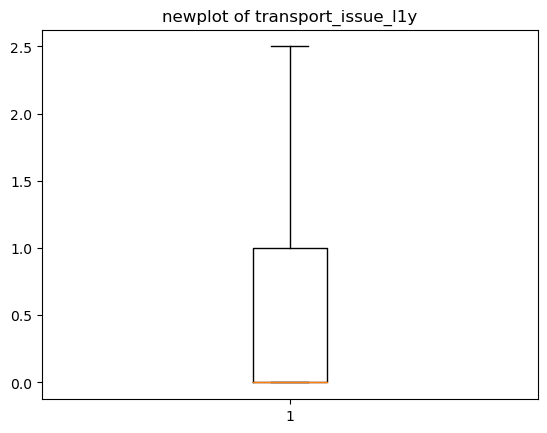

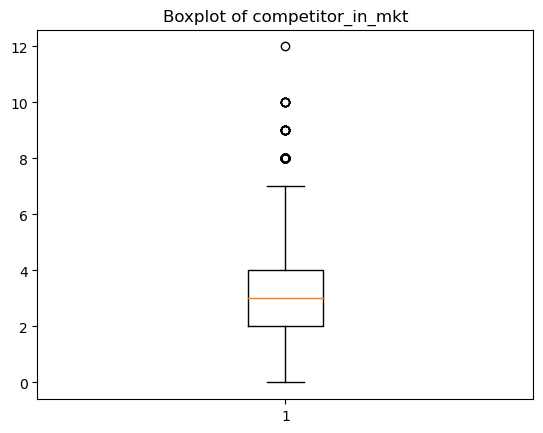

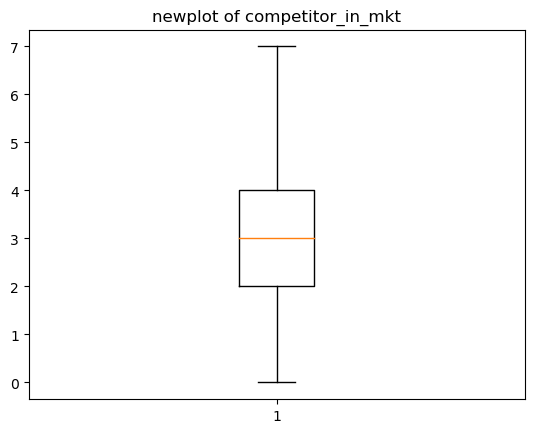

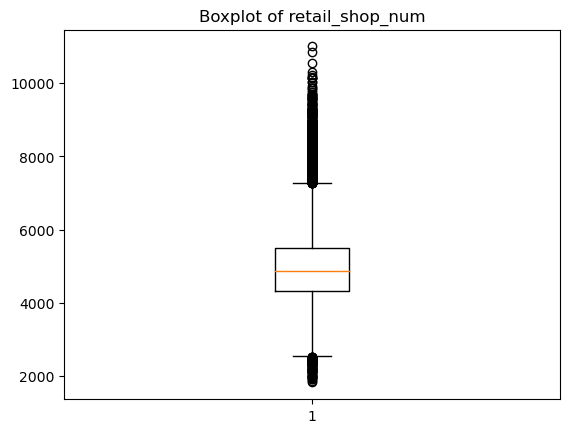

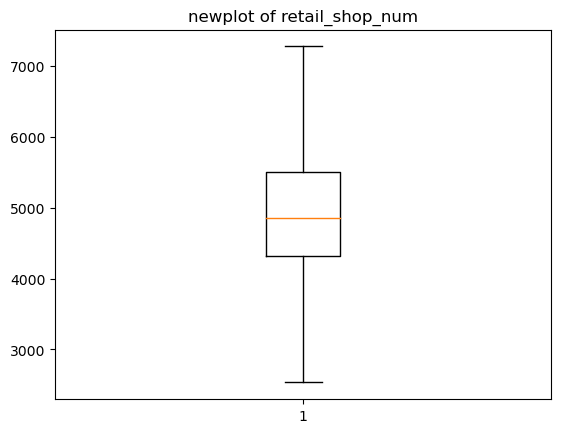

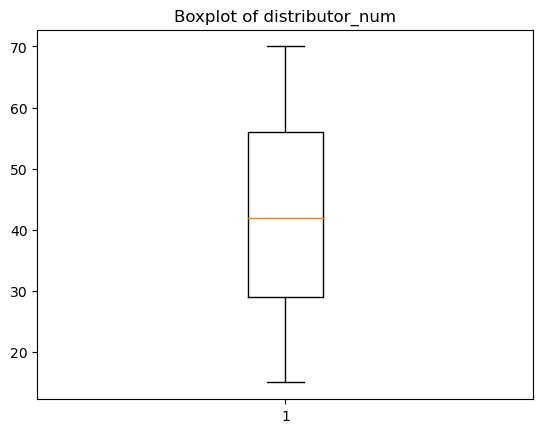

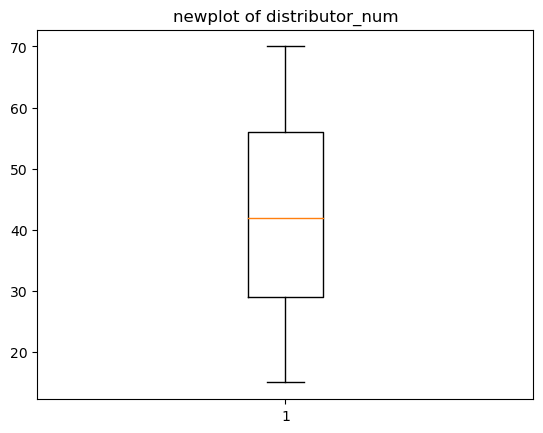

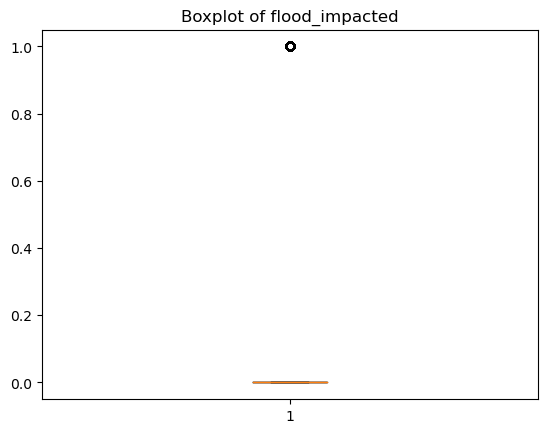

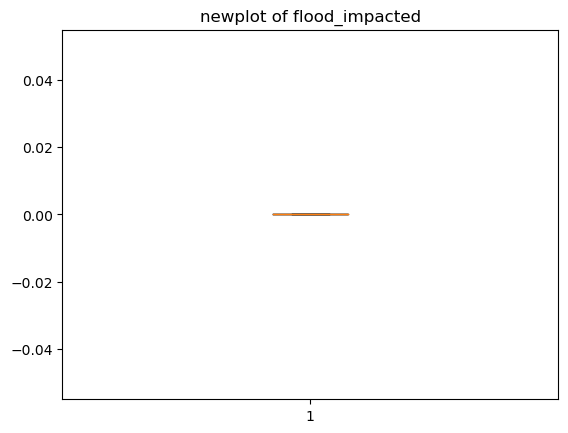

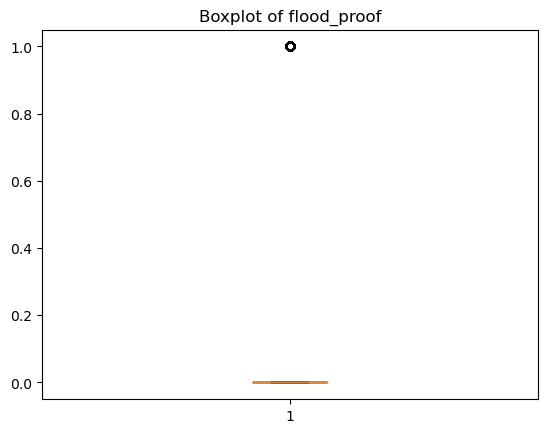

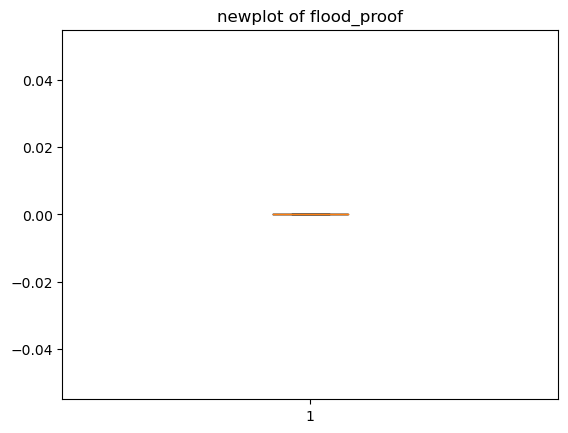

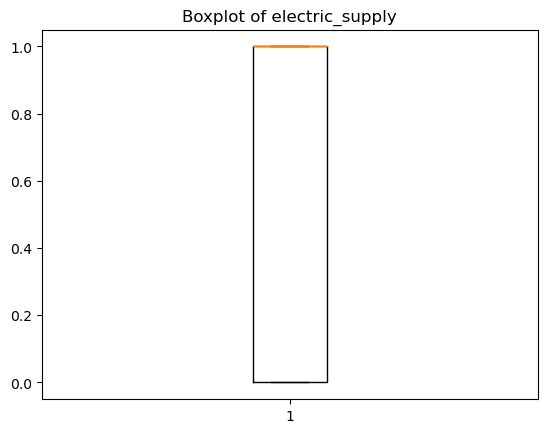

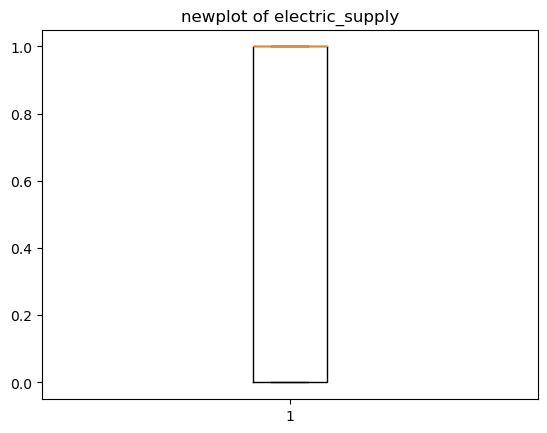

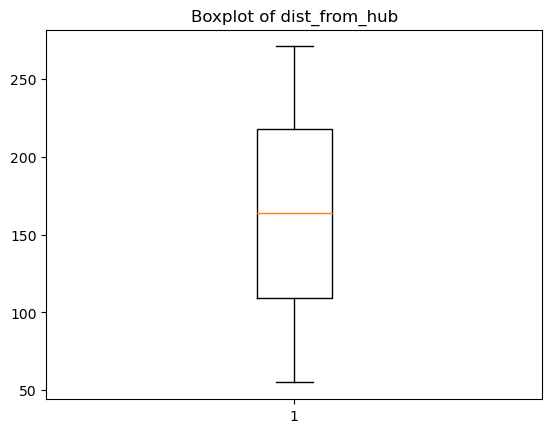

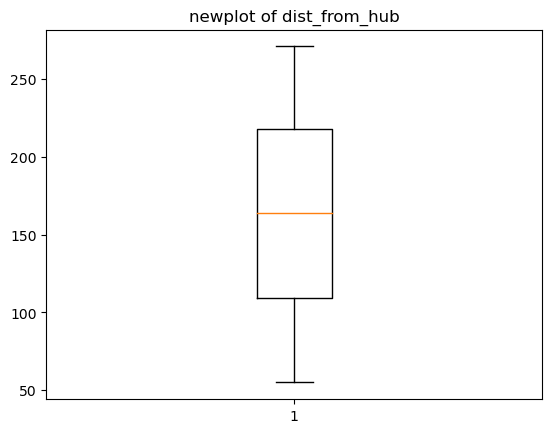

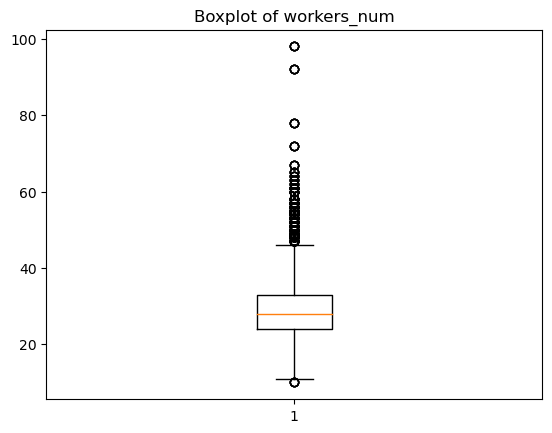

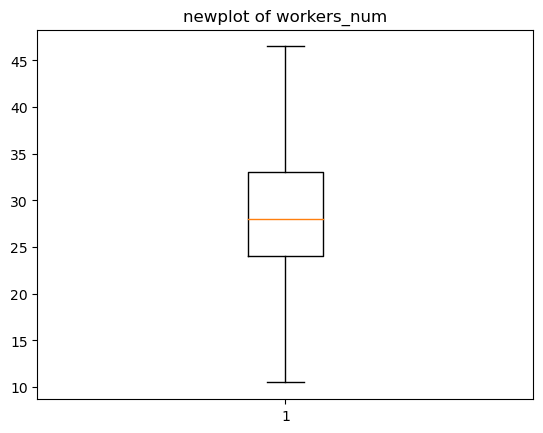

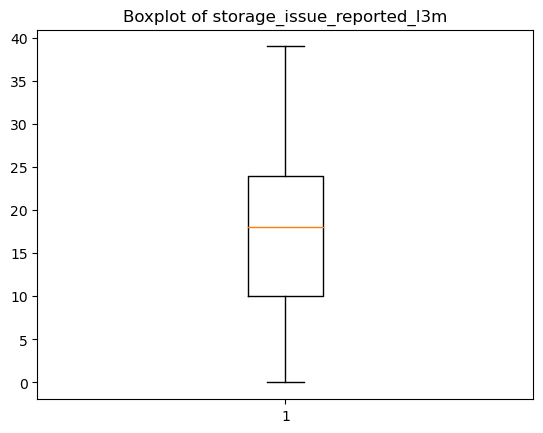

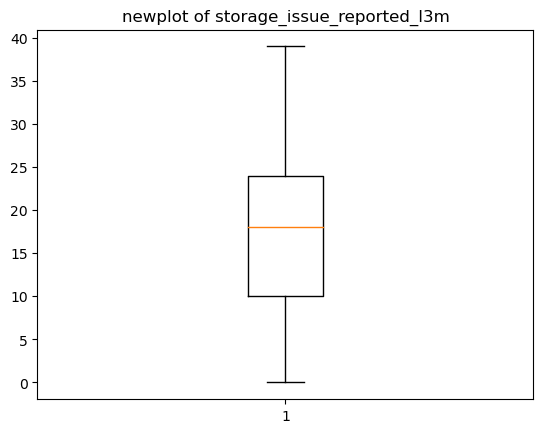

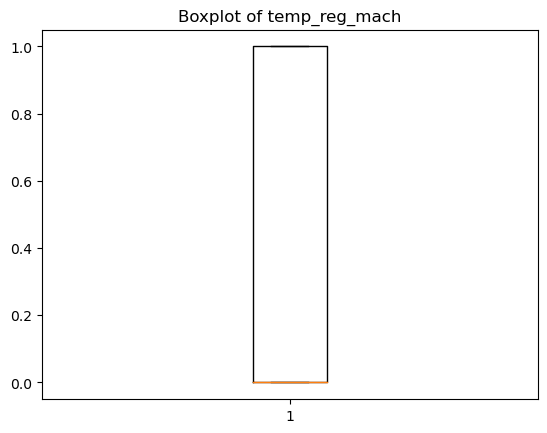

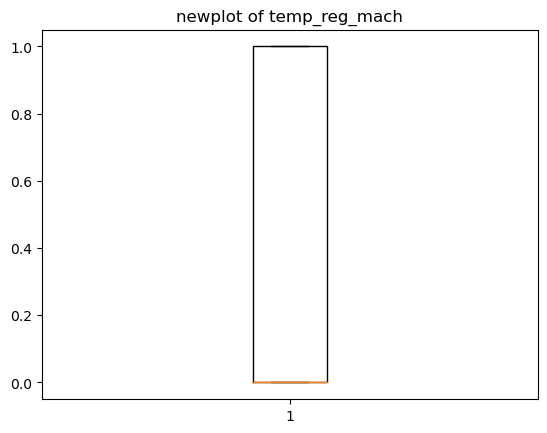

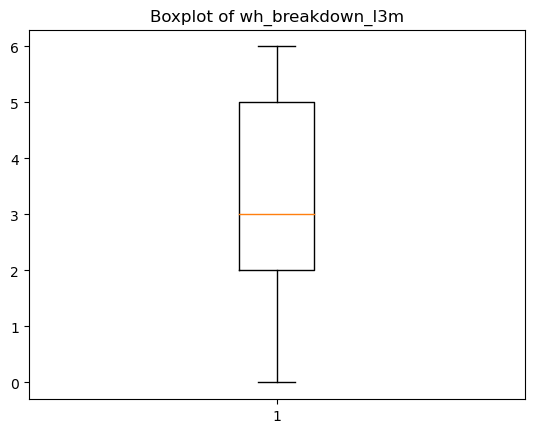

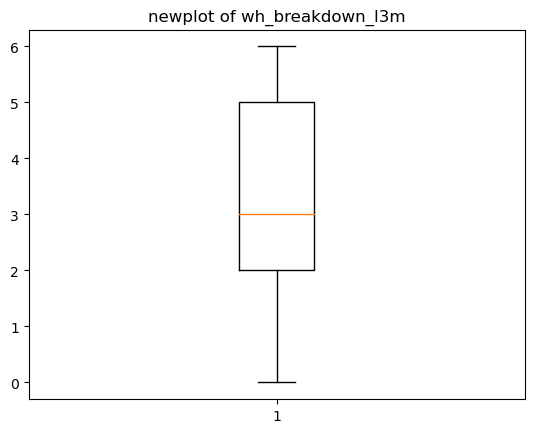

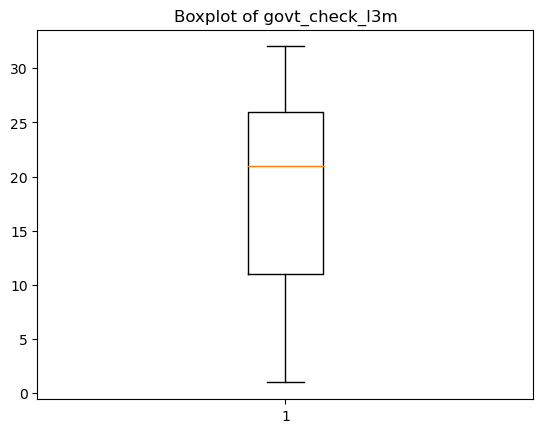

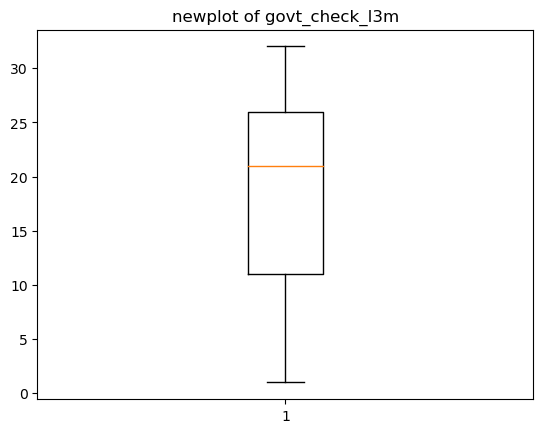

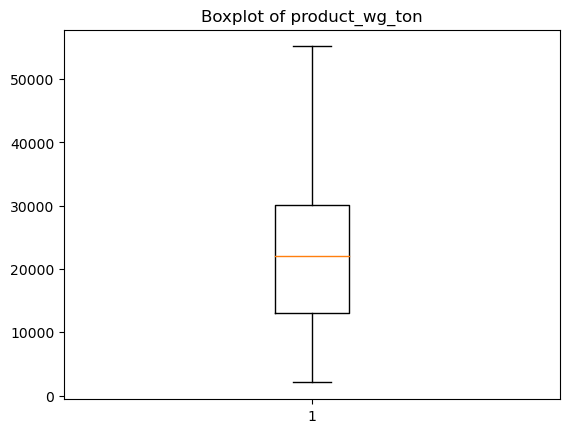

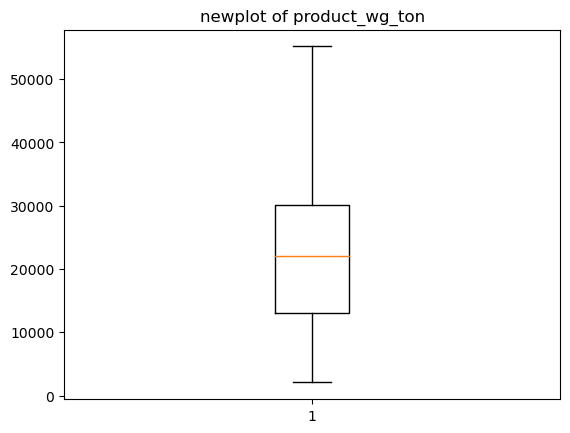

In [41]:
#Detecting & replacing outliers by lower and upper limit
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.boxplot(data[column])
    plt.title("Boxplot of "+column)
    plt.show()
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_limit = data[column].quantile(0.25) - (1.5 * IQR)
    upper_limit = data[column].quantile(0.75) + (1.5 * IQR)
    data[column] = np.clip(data[column], lower_limit, upper_limit) 
    plt.boxplot(data[column])
    plt.title("newplot of "+column)
    plt.show()

In [42]:
# Changing datatype
data[['flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']] = data[['flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']].astype("O")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   warehouse_id                  25000 non-null  object 
 1   wh_manager_id                 25000 non-null  object 
 2   location_type                 25000 non-null  object 
 3   wh_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   wh_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  float64
 8   competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  float64
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  object 
 13  f

In [43]:
data1=data.drop(["warehouse_id","wh_manager_id","wh_owner_type"],axis=1)
data1.columns

Index(['location_type', 'wh_capacity_size', 'zone', 'wh_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [44]:
# Encoding
numerical_columns = [feature for feature in data1.columns if data1[feature].dtype != 'O']
ordinal_columns = ["wh_capacity_size", "approved_wh_govt_certificate"]
ohe_categorical_columns = ['location_type', 'zone', 'wh_regional_zone', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']


In [45]:
numerical_columns

['num_refill_req_l3m',
 'transport_issue_l1y',
 'competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'workers_num',
 'storage_issue_reported_l3m',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [46]:
# Define the ordinal categories for each ordinal column
ordinal_categories = [['Large', 'Mid', 'Small'], ['B+', 'A', 'A+', 'B', 'C']]

# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Transform the ordinal columns in the DataFrame 'data1'
data1[ordinal_columns] = ordinal_encoder.fit_transform(data1[ordinal_columns])


In [47]:
data1

,location_type,wh_capacity_size,zone,wh_regional_zone,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,2.0,West,Zone 6,3,1.0,2,4651.0,24,0,0,1,91,29.0,13,0,1.0,5,15,17115
1,Rural,0.0,North,Zone 5,0,0.0,4,6217.0,47,0,0,1,210,31.0,4,0,1.0,3,17,5074
2,Rural,1.0,South,Zone 2,1,0.0,4,4306.0,64,0,0,0,161,37.0,17,0,1.0,6,22,23137
3,Rural,1.0,North,Zone 3,7,2.5,2,6000.0,50,0,0,0,103,21.0,17,1,2.0,3,27,22115
4,Rural,0.0,North,Zone 5,3,1.0,2,4740.0,42,0,0,1,112,25.0,18,0,4.0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Rural,2.0,North,Zone 1,3,0.0,4,5390.0,19,0,0,1,142,34.0,22,1,1.0,2,30,32093
24996,Rural,1.0,West,Zone 2,6,0.0,4,4490.0,57,0,0,1,130,28.0,10,0,3.0,4,18,12114
24997,Urban,0.0,South,Zone 5,7,0.0,2,5403.0,31,0,0,1,147,28.0,23,0,0.0,5,25,27080
24998,Rural,2.0,North,Zone 1,1,0.0,2,7280.5,25,0,0,1,60,25.0,18,0,1.0,6,30,25093


In [48]:
scaler = MinMaxScaler()
# Apply normalization only to the numerical columns in data1
data1[numerical_columns] = scaler.fit_transform(data1[numerical_columns])


In [49]:
data1

,location_type,wh_capacity_size,zone,wh_regional_zone,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,2.0,West,Zone 6,0.375,0.4,0.285714,0.446188,0.163636,0,0,1,0.166667,0.513889,0.333333,0,1.0,0.833333,0.451613,0.283502
1,Rural,0.0,North,Zone 5,0.000,0.0,0.571429,0.776011,0.581818,0,0,1,0.717593,0.569444,0.102564,0,1.0,0.500000,0.516129,0.056682
2,Rural,1.0,South,Zone 2,0.125,0.0,0.571429,0.373526,0.890909,0,0,0,0.490741,0.736111,0.435897,0,1.0,1.000000,0.677419,0.396941
3,Rural,1.0,North,Zone 3,0.875,1.0,0.285714,0.730307,0.636364,0,0,0,0.222222,0.291667,0.435897,1,2.0,0.500000,0.838710,0.377689
4,Rural,0.0,North,Zone 5,0.375,0.4,0.285714,0.464933,0.490909,0,0,1,0.263889,0.402778,0.461538,0,4.0,1.000000,0.741935,0.414535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Rural,2.0,North,Zone 1,0.375,0.0,0.571429,0.601832,0.072727,0,0,1,0.402778,0.652778,0.564103,1,1.0,0.333333,0.935484,0.565648
24996,Rural,1.0,West,Zone 2,0.750,0.0,0.571429,0.412279,0.763636,0,0,1,0.347222,0.486111,0.256410,0,3.0,0.666667,0.548387,0.189297
24997,Urban,0.0,South,Zone 5,0.875,0.0,0.285714,0.604570,0.290909,0,0,1,0.425926,0.486111,0.589744,0,0.0,0.833333,0.774194,0.471217
24998,Rural,2.0,North,Zone 1,0.125,0.0,0.285714,1.000000,0.181818,0,0,1,0.023148,0.402778,0.461538,0,1.0,1.000000,0.935484,0.433787


In [50]:
# Apply OneHotEncoder to the remaining categorical columns
onehot_encoder = OneHotEncoder(sparse=False, drop="first")
data1_encoded = onehot_encoder.fit_transform(data1[ohe_categorical_columns])



In [51]:
# Convert the encoded data to a DataFrame and concatenate with data1
data1 = pd.concat([data1.drop(columns=ohe_categorical_columns), pd.DataFrame(data1_encoded, columns=onehot_encoder.get_feature_names_out(ohe_categorical_columns))], axis=1)
data1


,wh_capacity_size,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,...,zone_North,zone_South,zone_West,wh_regional_zone_Zone 2,wh_regional_zone_Zone 3,wh_regional_zone_Zone 4,wh_regional_zone_Zone 5,wh_regional_zone_Zone 6,electric_supply_1,temp_reg_mach_1
0,2.0,0.375,0.4,0.285714,0.446188,0.163636,0.166667,0.513889,0.333333,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.000,0.0,0.571429,0.776011,0.581818,0.717593,0.569444,0.102564,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.125,0.0,0.571429,0.373526,0.890909,0.490741,0.736111,0.435897,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.875,1.0,0.285714,0.730307,0.636364,0.222222,0.291667,0.435897,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.375,0.4,0.285714,0.464933,0.490909,0.263889,0.402778,0.461538,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2.0,0.375,0.0,0.571429,0.601832,0.072727,0.402778,0.652778,0.564103,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
24996,1.0,0.750,0.0,0.571429,0.412279,0.763636,0.347222,0.486111,0.256410,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
24997,0.0,0.875,0.0,0.285714,0.604570,0.290909,0.425926,0.486111,0.589744,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
24998,2.0,0.125,0.0,0.285714,1.000000,0.181818,0.023148,0.402778,0.461538,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Model Building & Evaluation

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
# Splitting data into x and y; independant variables in x & dependant variable in y.
x = data1.drop(["product_wg_ton"], axis=1)
y = data["product_wg_ton"]
x.columns


Index(['wh_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'location_type_Urban', 'zone_North', 'zone_South', 'zone_West',
       'wh_regional_zone_Zone 2', 'wh_regional_zone_Zone 3',
       'wh_regional_zone_Zone 4', 'wh_regional_zone_Zone 5',
       'wh_regional_zone_Zone 6', 'electric_supply_1', 'temp_reg_mach_1'],
      dtype='object')

In [54]:
# Spliting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
 x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20000, 23), (20000,), (5000, 23), (5000,))

In [56]:
x_train

,wh_capacity_size,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,...,zone_North,zone_South,zone_West,wh_regional_zone_Zone 2,wh_regional_zone_Zone 3,wh_regional_zone_Zone 4,wh_regional_zone_Zone 5,wh_regional_zone_Zone 6,electric_supply_1,temp_reg_mach_1
23311,0.0,0.125,0.4,0.571429,0.326137,0.800000,0.847222,0.319444,0.717949,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
23623,1.0,1.000,0.0,0.428571,0.746946,0.690909,0.777778,0.541667,0.948718,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1020,0.0,1.000,0.0,0.571429,0.329718,0.581818,0.495370,0.430556,0.615385,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
12645,0.0,1.000,0.4,0.285714,0.405960,0.672727,0.319444,0.819444,0.666667,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1533,0.0,0.500,0.0,0.571429,0.481782,0.672727,0.449074,0.208333,0.487179,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1.0,0.750,0.0,0.571429,0.385320,0.618182,0.004630,0.402778,0.487179,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5390,0.0,0.000,0.4,0.571429,0.937342,0.145455,0.800926,0.430556,0.410256,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
860,1.0,0.875,0.4,0.428571,0.481361,0.127273,0.611111,0.375000,0.512821,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15795,1.0,0.125,0.0,0.285714,0.500527,0.854545,0.796296,0.430556,0.487179,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
x_train.reset_index(drop=True, inplace=True)
x_train


,wh_capacity_size,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,...,zone_North,zone_South,zone_West,wh_regional_zone_Zone 2,wh_regional_zone_Zone 3,wh_regional_zone_Zone 4,wh_regional_zone_Zone 5,wh_regional_zone_Zone 6,electric_supply_1,temp_reg_mach_1
0,0.0,0.125,0.4,0.571429,0.326137,0.800000,0.847222,0.319444,0.717949,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.000,0.0,0.428571,0.746946,0.690909,0.777778,0.541667,0.948718,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.000,0.0,0.571429,0.329718,0.581818,0.495370,0.430556,0.615385,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.000,0.4,0.285714,0.405960,0.672727,0.319444,0.819444,0.666667,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.500,0.0,0.571429,0.481782,0.672727,0.449074,0.208333,0.487179,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,0.750,0.0,0.571429,0.385320,0.618182,0.004630,0.402778,0.487179,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19996,0.0,0.000,0.4,0.571429,0.937342,0.145455,0.800926,0.430556,0.410256,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19997,1.0,0.875,0.4,0.428571,0.481361,0.127273,0.611111,0.375000,0.512821,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19998,1.0,0.125,0.0,0.285714,0.500527,0.854545,0.796296,0.430556,0.487179,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [58]:
x_test.reset_index(drop=True, inplace=True)
x_test


,wh_capacity_size,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,...,zone_North,zone_South,zone_West,wh_regional_zone_Zone 2,wh_regional_zone_Zone 3,wh_regional_zone_Zone 4,wh_regional_zone_Zone 5,wh_regional_zone_Zone 6,electric_supply_1,temp_reg_mach_1
0,0.0,0.375,1.0,0.428571,0.508109,0.600000,0.162037,0.347222,0.128205,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.750,0.0,0.428571,0.473147,0.927273,0.958333,0.347222,0.333333,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.0,0.375,0.8,1.000000,0.383214,0.345455,0.152778,0.236111,0.230769,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.125,0.0,0.571429,0.786963,0.236364,0.777778,0.152778,0.641026,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.125,0.0,0.285714,0.865944,0.927273,0.342593,0.430556,0.384615,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.250,1.0,0.285714,0.554023,0.945455,0.208333,0.708333,0.256410,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,2.0,0.625,0.0,0.428571,0.357519,0.727273,0.027778,0.402778,0.743590,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,0.0,0.875,1.0,0.857143,0.245682,0.600000,0.055556,0.319444,0.641026,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4998,0.0,0.875,0.8,0.571429,0.266744,0.600000,0.708333,0.319444,0.128205,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [59]:
data1.corr()

,wh_capacity_size,num_refill_req_l3m,transport_issue_l1y,competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,...,zone_North,zone_South,zone_West,wh_regional_zone_Zone 2,wh_regional_zone_Zone 3,wh_regional_zone_Zone 4,wh_regional_zone_Zone 5,wh_regional_zone_Zone 6,electric_supply_1,temp_reg_mach_1
wh_capacity_size,1.000000,-0.007054,0.008687,0.012836,0.069179,-0.001268,-0.001837,-0.000797,-0.005454,0.008558,...,-0.163964,0.158588,0.011182,0.105654,0.103988,0.129031,-0.500713,-0.118368,-0.009338,-0.001056
num_refill_req_l3m,-0.007054,1.000000,0.017975,0.002029,-0.002754,0.003995,0.000048,-0.013322,-0.006602,-0.011394,...,-0.006648,-0.003082,0.010150,-0.001653,0.005838,0.006507,-0.001008,0.001871,-0.007959,0.260928
transport_issue_l1y,0.008687,0.017975,1.000000,-0.003815,-0.001069,0.007277,0.013541,-0.007275,-0.150176,-0.013798,...,0.006832,-0.001384,-0.006688,-0.013874,0.001822,0.006653,-0.001476,0.000180,-0.011809,0.016204
competitor_in_mkt,0.012836,0.002029,-0.003815,1.000000,-0.165157,-0.001271,0.009044,-0.000075,0.009570,-0.005081,...,-0.086142,-0.306218,0.312750,-0.073311,0.019807,0.051930,-0.023701,0.017999,0.001574,0.009773
retail_shop_num,0.069179,-0.002754,-0.001069,-0.165157,1.000000,-0.000473,0.000837,-0.005185,-0.007224,-0.001123,...,0.052100,0.018092,-0.065072,0.014425,-0.055659,0.018856,-0.029642,0.007927,-0.009247,-0.001484
distributor_num,-0.001268,0.003995,0.007277,-0.001271,-0.000473,1.000000,-0.011838,-0.012208,0.003396,0.002420,...,-0.000771,-0.004271,0.007174,-0.000716,0.002140,0.002209,0.004555,-0.004060,0.000454,0.002827
dist_from_hub,-0.001837,0.000048,0.013541,0.009044,0.000837,-0.011838,1.000000,-0.017156,-0.005726,0.000159,...,-0.008478,0.005509,0.004338,-0.003927,-0.003012,0.008372,0.003479,-0.001481,-0.002701,0.000902
workers_num,-0.000797,-0.013322,-0.007275,-0.000075,-0.005185,-0.012208,-0.017156,1.000000,-0.008926,0.006192,...,-0.001569,-0.005263,0.005115,-0.011568,0.004205,-0.012944,0.001964,0.011217,0.354875,-0.000678
storage_issue_reported_l3m,-0.005454,-0.006602,-0.150176,0.009570,-0.007224,0.003396,-0.005726,-0.008926,1.000000,-0.159000,...,0.006153,-0.008199,-0.001131,0.010260,-0.003388,0.003773,-0.003670,0.001132,-0.001877,0.067309
approved_wh_govt_certificate,0.008558,-0.011394,-0.013798,-0.005081,-0.001123,0.002420,0.000159,0.006192,-0.159000,1.000000,...,0.007233,0.001292,-0.008937,-0.001374,0.010690,-0.003926,-0.004860,0.002739,-0.003356,0.004439


In [60]:
# #to check multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import statsmodels.api as sm

In [61]:
# # Add constant to the features
# x_train_with_const=sm.add_constant(x_train)

In [62]:
# # Calculate VIF for each predictor variable
# vif_data=pd.DataFrame()

In [63]:
# vif_data["Variable"] = x_train_with_const.columns
# vif_data["VIF"] = [variance_inflation_factor(x_train_with_const.values, i) for i in range(x_train_with_const.shape[1])]

In [64]:
# # Filter out the constant term
# vif_data = vif_data[vif_data["Variable"] != "const"]
# vif_data

In [65]:
# # Drop the 'zone' columns from the DataFrame as it has vif>10
# x_train.drop(['zone_North', 'zone_South', 'zone_West'], axis=1, inplace=True)
# x_test.drop(['zone_North', 'zone_South', 'zone_West'], axis=1, inplace=True)

In [66]:
model=LinearRegression()

In [67]:
model.fit(x_train,y_train)


LinearRegression()

In [68]:
y_pred_test=model.predict(x_test)
y_pred_test

array([ 5534.63190222, 17334.65540977, 11971.74351608, ...,
       31635.28348616,  6398.69862401, 25035.61122867])

In [69]:
y_test

6868      6058
24016    17073
9668     11101
13640    31095
14018    17134
         ...  
8670     12065
11839    38057
4013     31105
21147     7078
695      25084
Name: product_wg_ton, Length: 5000, dtype: int64

In [70]:
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_test=np.sqrt(mse_test)
print("RMSE_test:",rmse_test)


RMSE_test: 1711.9250669568498


In [71]:
y_pred_train=model.predict(x_train)
y_pred_train

array([34530.45167672, 46742.44091352, 31742.25090605, ...,
       26053.76492757, 25029.31628203, 23554.68916752])

In [72]:
mse_train=mean_squared_error(y_train,y_pred_train)
rmse_train=np.sqrt(mse_train)
print("RMSE_train:",rmse_train)

RMSE_train: 1704.707908035517


In [73]:
accuracy_train=model.score(x_train,y_train)
accuracy_train

0.9784687637437304

In [74]:
accuracy_test=model.score(x_test,y_test)
accuracy_test

0.9780964832430324

In [75]:
r_score = r2_score(y_train,y_pred_train)
r_score

0.9784687637437304

**Model Performance**: With an impressive accuracy of approximately **97.8%** on both the training and test datasets, our model demonstrates robust predictive capabilities. This level of accuracy instills confidence in its ability to effectively forecast the target variable. Additionally, the RMSE (Root Mean Square Error) values indicate that the model's predictions are, on average, within approximately 1712 units of the actual values for the test dataset and 1705 units for the training dataset.

**Goodness of Fit**: The R-squared value of approximately 0.978 suggests that our model explains roughly 97.8% of the variance in the target variable, which is quite good. It shows that our model captures a significant portion of the underlying patterns in the data.

**Consistency**: The similar performance metrics on both the training and test datasets suggest that the model generalizes well to unseen data, indicating that it is not overfitting.

**Overall Assessment**: Our linear regression model appears to be a reliable tool for predicting our target variable based on the provided features. While there's always room for improvement and further analysis, these results give us confidence that our model is on the right track and can provide valuable insights for decision-making.